# Data Science Academy

## Análise de Dados com Linguagem Python

### Projeto 9

### Pré - Processamento de Dados de Texto Extraídos de Data Lake

In [131]:
# Imports
import json
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Conectando no Data Lake

In [132]:
# Abra a conexão
client = pymongo.MongoClient("mongodb://localhost:27017/")

In [133]:
# Visualiza a conexão
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [134]:
# Cria um repositório chamado datalake
datalake = client["datalake"]

In [135]:
datalake

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'datalake')

In [136]:
# Se existir, deleta a coleção chamada posts
datalake.posts.drop()

In [137]:
# Cria a coleção chamada posts
posts = datalake["posts"] 

### Carregando Dados no Data Lake

In [138]:
# Carrega o arquivo json em uma variavel Python
with open ('dataset.json') as file:
    file_data = json.load(file)

In [139]:
file_data

[{'status': 'public',
  'creationDate': '2017-07-17T20:05:49Z',
  'allowComments': True,
  'title': 'ligula nec sem duis aliquam',
  'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
  'tags': 1,
  'Category': 'lifestyle',
  'filteredPicture': False},
 {'status': 'private',
  'creationDate': '2019-01-19T15:45:57Z',
  'allowComments': False,
  'title': 'mus vivamus vestibulum sagittis sapien cum',
  'description': 'nec nisi volutpat eleifend donec ut dolor morbi vel le

In [140]:
# Insere o conteúdo do arquivo json na coleção chamada posts. Cada item do arquivo será um documento.
posts.insert_many(file_data, ordered = False, bypass_document_validation = True)

InsertManyResult([ObjectId('6664e8a5849f9d0964715f70'), ObjectId('6664e8a5849f9d0964715f71'), ObjectId('6664e8a5849f9d0964715f72'), ObjectId('6664e8a5849f9d0964715f73'), ObjectId('6664e8a5849f9d0964715f74'), ObjectId('6664e8a5849f9d0964715f75'), ObjectId('6664e8a5849f9d0964715f76'), ObjectId('6664e8a5849f9d0964715f77'), ObjectId('6664e8a5849f9d0964715f78'), ObjectId('6664e8a5849f9d0964715f79'), ObjectId('6664e8a5849f9d0964715f7a'), ObjectId('6664e8a5849f9d0964715f7b'), ObjectId('6664e8a5849f9d0964715f7c'), ObjectId('6664e8a5849f9d0964715f7d'), ObjectId('6664e8a5849f9d0964715f7e'), ObjectId('6664e8a5849f9d0964715f7f'), ObjectId('6664e8a5849f9d0964715f80'), ObjectId('6664e8a5849f9d0964715f81'), ObjectId('6664e8a5849f9d0964715f82'), ObjectId('6664e8a5849f9d0964715f83'), ObjectId('6664e8a5849f9d0964715f84'), ObjectId('6664e8a5849f9d0964715f85'), ObjectId('6664e8a5849f9d0964715f86'), ObjectId('6664e8a5849f9d0964715f87'), ObjectId('6664e8a5849f9d0964715f88'), ObjectId('6664e8a5849f9d0964715f

In [141]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('6664e8a5849f9d0964715f70'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False}

In [142]:
# Extrai o número de documentos (posts)
n = posts.estimated_document_count()

In [143]:
n

2000

### Pré - Processamento e Análise 

Agregação para calcular o número de posts em cada categoria

In [144]:
# Agregação para calcular o número de posts em cada categoria
posts_cat = posts.aggregate([{"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                             {"$sort": {"_id.Category": 1, "count": -1}}])

In [145]:
print(posts_cat)

In [146]:
# Converte o resultado da agregação em um dataframe
pc_df = pd.DataFrame(list(posts_cat))

In [147]:
pc_df.head()

,_id,count
0,arts,311
1,fashion,300
2,lifestyle,294
3,movies,289
4,politics,274


In [148]:
# Listas os ids (Categorias)
list(pc_df["_id"])

['arts', 'fashion', 'lifestyle', 'movies', 'politics', 'educational', 'sports']

<AxesSubplot:ylabel='count'>

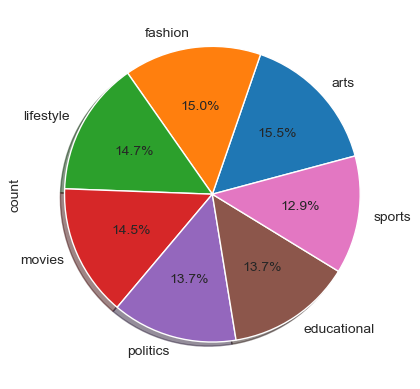

In [149]:
# Plot
pc_df.plot.pie(y = 'count',
               labels = pc_df['_id'],
               autopct = '%1.1f%%',
               startangle = 15,
               shadow = True,
               legend = False)

Número de posts publicos e privados da categoria polítics

In [150]:
# Número de posts públicos e privados da categoria política
pol_sta = posts.aggregate([{"$match": {"Category": "politics"}},
                           {"$group": {"_id": "$status", "count": {"$sum": 1}}}])

In [151]:
ps_df = pd.DataFrame(list(pol_sta))

In [152]:
ps_df

,_id,count
0,private,148
1,public,126


<AxesSubplot:title={'center':'Número de Posts Públicos e Privados'}, xlabel='_id'>

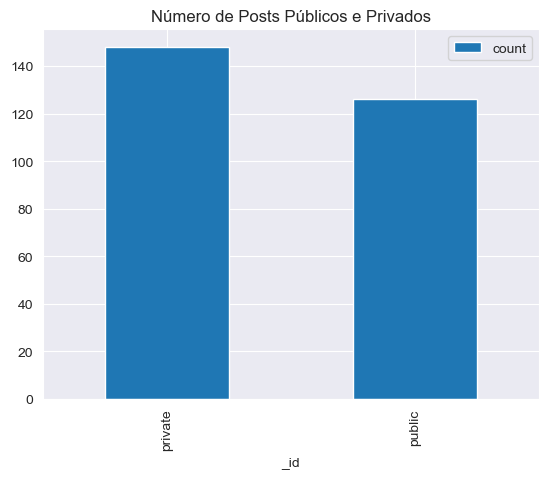

In [153]:
# Plot
ps_df.plot.bar(x = '_id',
               y = 'count',
               title = "Número de Posts Públicos e Privados")


Qual ano teve o maior número de posts?

In [154]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('6664e8a5849f9d0964715f70'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False}

In [155]:
# Update many (cria duas novas variáveis para cada documento)
datalake.posts.update_many({}, {'$set': {"hour": 0}});
datalake.posts.update_many({}, {'$set': {"year": 0}});

In [156]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('6664e8a5849f9d0964715f70'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': 0,
 'year': 0}

In [157]:
# Update one (atualiza as duas variáveis com os valores correspondetes extraídos da coluna de data)
for data in posts.find({}):
    posts.update_one({"_id": data['_id']},
                     {'$set': {'hour': data['creationDate'].split('T')[1].split(':')[0],
                               'year': data['creationDate'].split('T')[0].split('-')[0]}})

In [158]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('6664e8a5849f9d0964715f70'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': '20',
 'year': '2017'}

In [159]:
# Agregação 
posts_yr = posts.aggregate([{"$group": {"_id": "$year", "count": {"$sum": 1}}},
                            {"$sort": {"_id.year": 1, "count": 1}}])

In [160]:
py_df = pd.DataFrame(list(posts_yr))
py_df

,_id,count
0,2015,76
1,2016,299
2,2019,303
3,2017,309
4,2021,330
5,2020,334
6,2018,349


<AxesSubplot:title={'center':'Número de Posts Por Ano'}, xlabel='_id'>

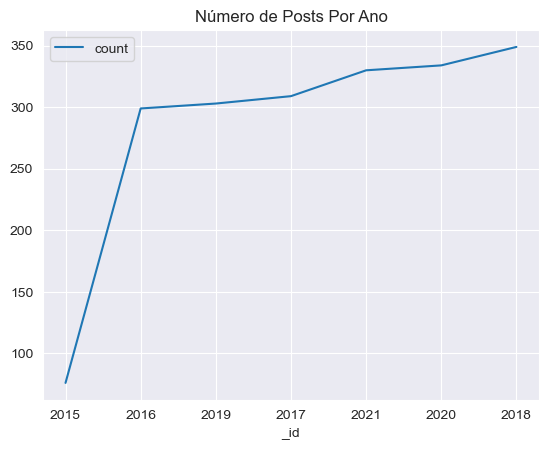

In [161]:
# Plot 
py_df.plot.line(x = '_id',
                y = 'count',
                title = "Número de Posts Por Ano")

Qual o horário com maior número de posts?

In [162]:
# Agregação e ordenação
posts_hr = posts.aggregate([{"$group": {"_id": "$hour", "count": {"$sum": 1}}},
                            {"$sort": {"_id.hour": 1, "count": -1}}])

In [163]:
for i in range(3):
    print(posts_hr.next())

{'_id': '00', 'count': 103}
{'_id': '08', 'count': 101}
{'_id': '02', 'count': 99}


Número de posts em hora cheia (teminada por 00) por categoria

In [164]:
# Filtro, agregação e ordenação
cat_00 = posts.aggregate([{"$match": {"hour": "00"}},
                          {"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                          {"$sort": {"_id.Category": 1, "count": -1}}])

In [165]:
c0_df = pd.DataFrame(list(cat_00))

<AxesSubplot:title={'center':'Número de Posts em Hora Cheia'}, xlabel='_id'>

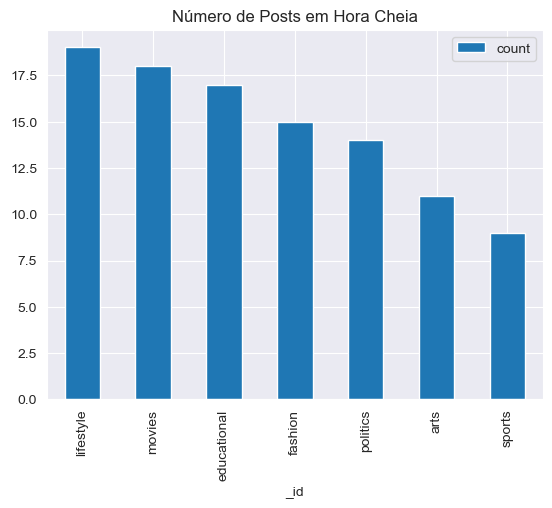

In [166]:
c0_df.plot.bar(x = '_id', y = 'count', title = "Número de Posts em Hora Cheia")

Número de posts que permitem comentários

In [167]:
# Count
com = posts.count_documents({'allowComments': True})

In [168]:
print("Número de Posts Que Permitem Comentários:", com)

Número de Posts Que Permitem Comentários: 964


In [169]:
print("Números de Posts Que Não Permitem Comentários:", n-com)

Números de Posts Que Não Permitem Comentários: 1036


Text(0, 0.5, 'Número de Posts')

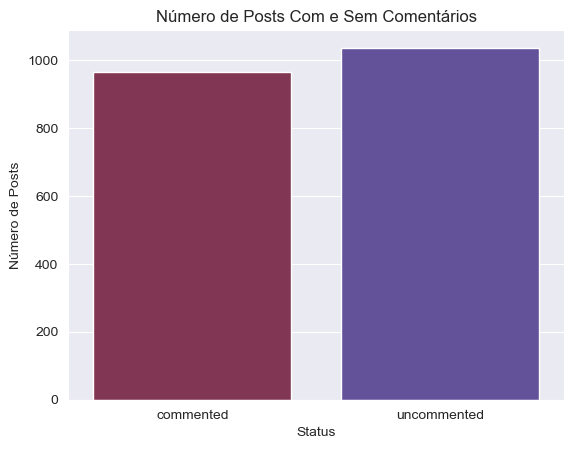

In [170]:
# Plot
sns.set_style('darkgrid')
x = ['commented', 'uncommented']
y = [com, n-com]
sns.barplot(x, y, palette = 'twilight_r')
plt.title("Número de Posts Com e Sem Comentários")
plt.xlabel("Status")
plt.ylabel("Número de Posts")

Comprimento do título dos posts

In [171]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('6664e8a5849f9d0964715f70'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': '20',
 'year': '2017'}

In [172]:
# Cria uma nova coluna
datalake.posts.update_many({}, {"$set": {"length_of_heading": 0}});

In [173]:
# Loop para preencher a nova coluna
for data in posts.find({}):
    posts.update_one({"_id": data['_id']},
                     {"$set": {"lenght_of_heading": len(data['title'].split(' '))}})

In [174]:
# Agrupamento e ordenação 
len_titles = posts.aggregate([{"$group": {"_id": "$lenght_of_heading", "count": {"$sum": 1}}},
                              {"$sort": {"_id.length_of_heading": 1, "count": -1}}])

In [175]:
len_titles

In [176]:
title_df = pd.DataFrame(list(len_titles))
title_df.head()

,_id,count
0,3,355
1,4,345
2,1,343
3,5,337
4,6,336


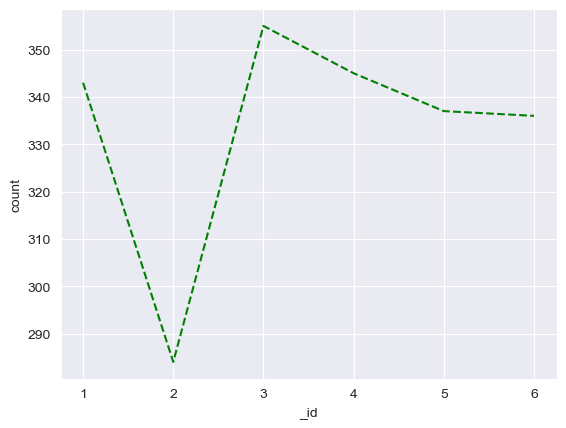

In [177]:
# Plot
ax = sns.lineplot(x = '_id', y = 'count', data = title_df, color = 'green')
ax.lines[0].set_linestyle("--")
plt.show()

Número de tags por categoria de posts

In [178]:
# Agregação
tags = posts.aggregate([{"$group": {"_id": "$tags", "count": {"$sum": 1}}},
                        {"$sort": {"_id.tags": 1, "count": -1}}])

In [179]:
cat_tags = posts.find({'tags': {'$gt': 0}}, {"Category": 1})
cat_tags

In [180]:
# Categorias com posts com maior número de tags
cat_tags = posts.aggregate([{"$match": {"tags": {"$gt": 0}}},
                            {"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                            {"$sort": {"_id.tags": 1, "count": -1}}])

In [181]:
ct_df = pd.DataFrame(list(cat_tags))
ct_df

,_id,count
0,fashion,276
1,arts,276
2,movies,264
3,lifestyle,262
4,politics,258
5,educational,255
6,sports,235


<AxesSubplot:xlabel='_id', ylabel='count'>

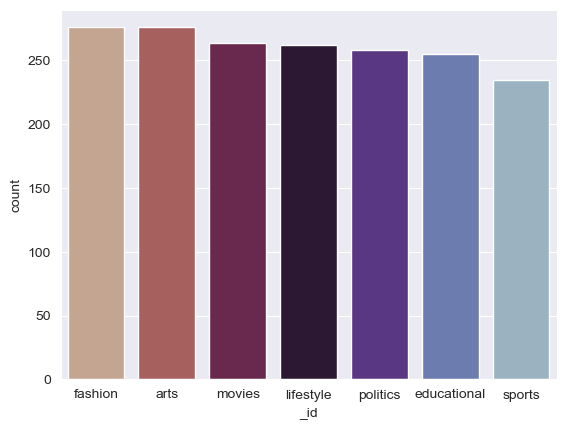

In [182]:
sns.barplot(x = '_id', y = 'count', data = ct_df, palette = 'twilight_r')

Qual categoria usa mais filtros de fotos/imagens?

In [183]:
# Filtro, agregação e ordenação
cat_fs = posts.aggregate([{"$match": {"filteredPicture": True}},
                          {"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                          {"$sort": {"_id.tags": 1, "count": -1}}])

In [184]:
for i in range(7):
    print(cat_fs.next())

{'_id': 'fashion', 'count': 159}
{'_id': 'movies', 'count': 154}
{'_id': 'arts', 'count': 146}
{'_id': 'lifestyle', 'count': 136}
{'_id': 'educational', 'count': 135}
{'_id': 'politics', 'count': 131}
{'_id': 'sports', 'count': 117}


Nível Ninja: Qual categoria tem posts (descrição) mais longos (com maior número de palavras), acima de 60 caracteres?

In [185]:
# Cria a variável
datalake.posts.update_many({}, {"$set": {"lenght_of_des": 0}});

In [186]:
# Loop para preencher a variável
for data in posts.find({}):
    posts.update_one({"_id": data['_id']}, {"$set": {'lenght_of_des': len(data['description'].split(' '))}})

In [187]:
# Filtro, agregação e ordenação 
cat_des = posts.aggregate([{"$match": {"lenght_of_des": {"$gte": 60}}},
                           {"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                           {"$sort": {"_id.tags": 1, "count": -1}}])

In [188]:
for i in range(7):
    print(cat_des.next())

{'_id': 'arts', 'count': 178}
{'_id': 'fashion', 'count': 161}
{'_id': 'movies', 'count': 159}
{'_id': 'lifestyle', 'count': 156}
{'_id': 'educational', 'count': 156}
{'_id': 'politics', 'count': 146}
{'_id': 'sports', 'count': 130}


Nível Ninja das Galaxias: O número de posts (descrição) varia de acordo com a hora do dia? Aumenta ou diminui?

In [189]:
# Agregação e ordenação por hora e categoria
posts_hr = posts.aggregate([{"$group": {"_id": ["$hour", "$Category"], "count": {"$sum": 1}}},
                            {"$sort": {"_id.hour": 1, "count": -1}}])

In [190]:
postshr_df = pd.DataFrame(posts_hr)
postshr_df

,_id,count
0,"[11, arts]",23
1,"[08, politics]",21
2,"[11, educational]",20
3,"[16, lifestyle]",20
4,"[02, lifestyle]",19
...,...,...
163,"[06, sports]",5
164,"[22, politics]",5
165,"[13, sports]",5
166,"[11, lifestyle]",4


In [191]:
# Split
split_df = pd.DataFrame(postshr_df['_id'].to_list(), columns = ['hour', 'category'])
split_df

,hour,category
0,11,arts
1,08,politics
2,11,educational
3,16,lifestyle
4,02,lifestyle
...,...,...
163,06,sports
164,22,politics
165,13,sports
166,11,lifestyle


In [192]:
# Concatenação
df = pd.concat([split_df, postshr_df['count']], axis = 1)
df

,hour,category,count
0,11,arts,23
1,08,politics,21
2,11,educational,20
3,16,lifestyle,20
4,02,lifestyle,19
...,...,...,...
163,06,sports,5
164,22,politics,5
165,13,sports,5
166,11,lifestyle,4


In [193]:
df.head()

,hour,category,count
0,11,arts,23
1,08,politics,21
2,11,educational,20
3,16,lifestyle,20
4,02,lifestyle,19


<function matplotlib.pyplot.show(close=None, block=None)>

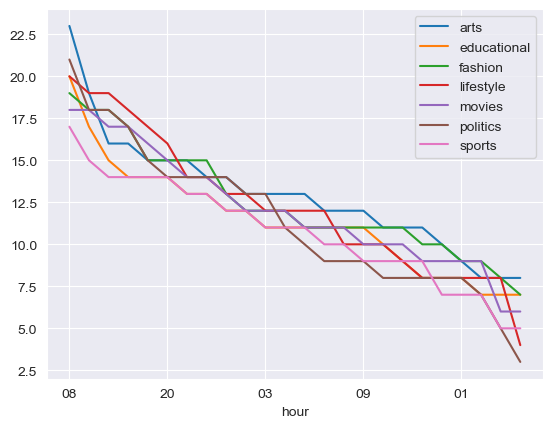

In [194]:
# Plot
fig, ax = plt.subplots()
for key, grp in df.groupby(['category']):
    ax = grp.plot(ax = ax, kind = 'line', x = 'hour', y = 'count', label = key)

plt.legend(loc = 'best')
plt.show

# Fim